/home/liuli/miniconda3/envs/keras220CpuJupyter/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/liuli/miniconda3/envs/keras220CpuJupyter/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/liuli/miniconda3/envs/keras220CpuJupyter/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not lay

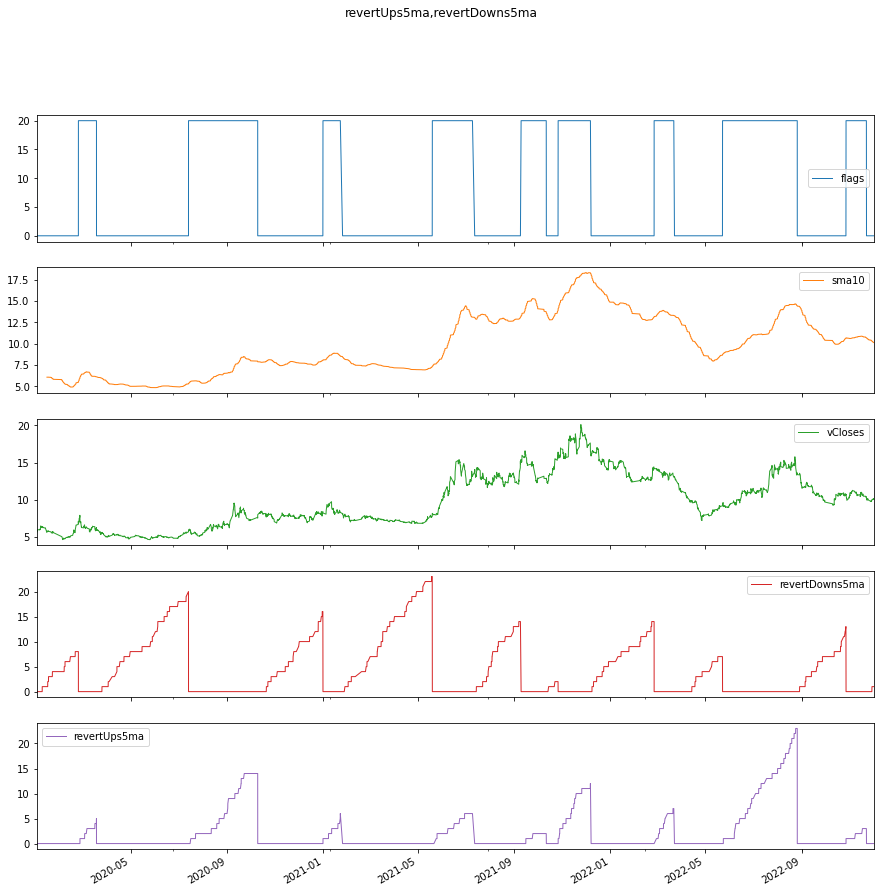

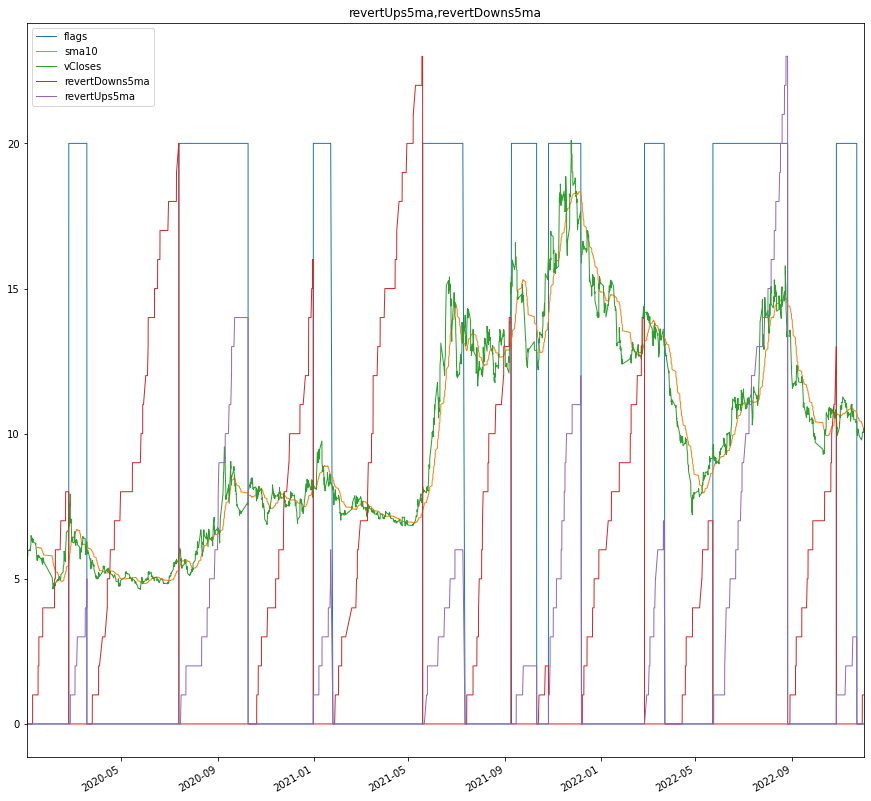

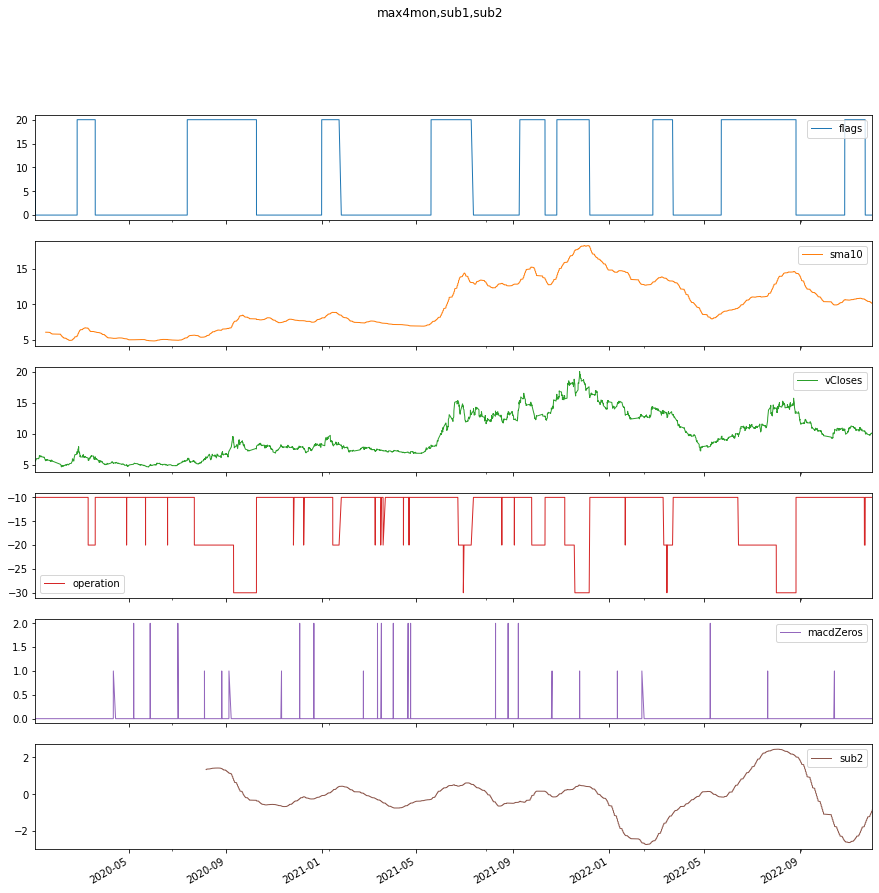

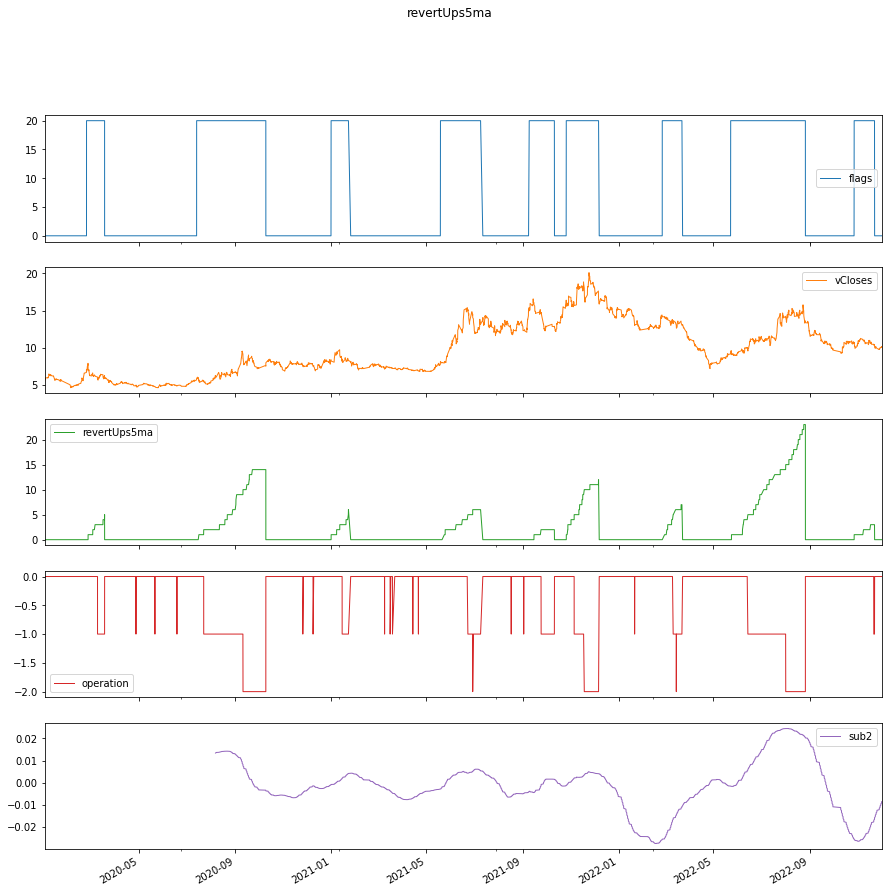

In [4]:
##################################################################################
#####开始自己写1
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
 
import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])
import pandas as pd
import backtrader as bt
import talib as ta 
from backtrader.order import Order
#from backtrader_plotting import Bokeh
#from backtrader_plotting.schemes import Tradimo

########################################################################################################################### 

# Create a Stratey
class MyStrategy(bt.Strategy):
 
    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))
 
    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close
        # To keep track of pending orders
        
    

 
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
                # 做多/做空 订单 已提交/已执行 到/被代理 - 无事可做
                return

        # 检查订单是否已经完成
        # 注意：如果没有足够资金，代理可能拒绝订单
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('BUY EXECUTED, %.2f' % order.executed.price)
            elif order.issell():
                self.log('SELL EXECUTED, %.2f' % order.executed.price)

            

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        
        return

    def notify_trade(self, trade):

        if not trade.isclosed:
            return
        self.log('权益, 赢亏 %.2f, 总赢亏（含佣金） %.2f' %(trade.pnl, trade.pnlcomm))
       
                 
                 
    def next(self):
        #self.datas[0] ↔ self.data0 ↔ self.data
        #self.datas[X].lines[Y] ↔self.data[Y]
        #print(self.datas[0].lines.getlinealiases())
        #print(self.datas[0].lines.datetime[0])
        #index1 =self.datas[0].lines.datetime[0]
        #index2 = bt.num2date(index1)
        #print('self.datas[0].lines.datetime[0] ',index2)
              
        #print(" -1",self.datas[0].datetime.date(-1)," 0",self.datas[0].datetime.date(0))
        #print(" -1",self.data[-1]," 0",self.data[0])
        #print(" -1",self.datas[0].lines.close[-1]," 0",self.datas[0].lines.close[0])
        #print(" -1",self.datas[0].close[-1]," 0",self.datas[0].close[0])
        
        ##self.log('Close, %.2f,operation %f,macdZeros %f' % (self.dataclose[0],operation,macdZeros))
        #print('当前可用资金', self.broker.getcash())
        #print('当前总资产', self.broker.getvalue())
        #print('当前持仓量', self.broker.getposition(self.data).size)
        #print('当前持仓成本', self.broker.getposition(self.data).price)
        # 也可以直接获取持仓
        #print('当前持仓量', self.getposition(self.data).size)
        #print('当前持仓成本', self.getposition(self.data).price)
        # 日志输出收盘价数据
        
        index1 =self.datas[0].lines.datetime[0]
        index1 = bt.num2date(index1)
        index1 = pd.Timestamp(index1)
        operation=allDat_global.loc[index1]['operation']
        macdZeros=allDat_global.loc[index1]['macdZeros']
        
        
        if macdZeros>=2:
            self.log('下单买单, %.2f' % self.dataclose[0])
                    # 跟踪创建的订单以避免第二个订单
            self.buy(size=10)
            
        
        if operation<=-2 and self.position:
            #self.order =self.sell()
            order =self.close()#平仓
            self.log("下单平仓单,%.2f" %self.dataclose[0])
                    
        #self.log('Close, %.2f,operation %f,macdZeros %f' % (self.dataclose[0],operation,macdZeros))
        return
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
########################################################################################################################### 
###人工调试的第1个特征集合
def genFeatures1(df1,params):
    
    vCloses = df1['close']
    #print(vCloses.head(10))
    times =4;#如果是60分钟的数据需要一个加倍,每天4小时交易时间
    sma5 = ta.SMA(vCloses,5*times)
    sma5pct = sma5.pct_change()
    sma10 = ta.SMA(vCloses,10*times)
    sma10pct = sma10.pct_change()
    sma20 = ta.SMA(vCloses,20*times)
    sma20pct = sma20.pct_change()

    sma30 = ta.SMA(vCloses,30*times)
    sma30pct = sma30.pct_change()
    sma30pctpct = sma30pct.pct_change()

    sma2 = ta.SMA(vCloses,2*times)
    sma2pct = sma2.pct_change()
    sma3 = ta.SMA(vCloses,3*times)
    sma3pct = sma3.pct_change()

    sma5 = ta.SMA(vCloses,5*times)
    sma5pct = sma5.pct_change()


    counter = 0
    zeros = pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])
    flags = pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])
    revertUps=pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])
    revertDowns= pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])

    revertUps5ma=pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])
    revertDowns5ma= pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])

    changeFlagDown= pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])
    changeFlagUp= pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])

    sub1 = pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])
    max4mon = pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])

    max4mon = ta.MAX(vCloses,4*21*times)#4month ,4*21*4
    min4mon = ta.MIN(vCloses,4*21*times)#4month ,4*21*4

    operation= pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])
    macdZeros= pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])
    macdZerosAdd= pd.Series(index=sma10pct.index,data = [0 for i in range(len(sma10pct))])
    diff, dea,macdhist = ta.MACD(vCloses, fastperiod=12*times, slowperiod=26*times, signalperiod=9*times)
    diffpct = diff.pct_change()
    macdhistpct = macdhist.pct_change()
    lineSLOPE = ta.LINEARREG_SLOPE(vCloses, timeperiod=20*times)
    sma10diff = vCloses - sma10
    
    counter = 0
    lastIndex = 0
    sub1= sma10-max4mon
    sub2 = ta.LINEARREG_SLOPE(sub1, timeperiod=60*times) 
    
    for index, row in sma30pct.items():
        if counter ==0:
            counter= counter+1
            lastIndex = index
            continue
        
  

        ##################################################################    
        ###趋势辨别,上升趋势后边界比较放松，因为上升趋势定卖点，卖点可以由其他特征共同决策
        ###趋势辨别,下降趋势后边界比较紧张，因为下降趋势定买点。买点尽可能接近拐点，以及中间减少甚至消除正跳变

      
        flag =  1 if lineSLOPE[index] > 0 else -1
        if flags[lastIndex] == 1 and (sma10pct[index]>-0.001 or lineSLOPE[index]>-0.01) and sma20pct[index]>0:
            flag = 1


        if flags[lastIndex] == -1 and (sma10pct[index]<0.001 or lineSLOPE[index]<0.01):
            flag = -1






        ##################################################################    
        ###波动辨别
        ##1.基于5ma变化,连续穿越5ma
        if (flag == 1): 
                revertUps5ma[index]=revertUps5ma[lastIndex]  
        #上一时刻大于5ma线，下一时刻小于5ma线，上升阶段5ma反转标记次数+1
        if (flag == 1) and (vCloses[index]<sma3[index]) and (vCloses[lastIndex]>sma3[lastIndex]):
                revertUps5ma[index]=revertUps5ma[lastIndex]+1     

        if (flag == -1): 
                revertDowns5ma[index]=revertDowns5ma[lastIndex]
        #上一时刻小于于5ma线，下一时刻大于5ma线，下降阶段5ma反转标记次数+1
        if (flag == -1) and(vCloses[index]>sma3[index]) and (vCloses[lastIndex]<sma3[lastIndex]):
                revertDowns5ma[index]=revertDowns5ma[lastIndex]+1


        ##################################################################
        ###辨别卖操作,
        if(flag == 1):
            operation[index] =  operation[lastIndex]
        

        #params['revertUps5maSell_1'] = 3
        if (flag ==  1) and (revertUps5ma[index] >=params['revertUps5maSell_1']):
                operation[index] = -1
                if (macdhist[lastIndex]>0) and (macdhist[index]<0) and (sub2[index]<0.01):
                    operation[index] = -2
        
        #params['revertUps5maSell_2'] = 10
        if (flag ==  1) and (revertUps5ma[index] >=params['revertUps5maSell_2']) and sub2[index]<0.01:
            operation[index] = -2
        if (flag ==  1) and (revertUps5ma[index] >=params['revertUps5maSell_3']) and sub2[index]>0.01:
            operation[index] = -2

   
        if (macdhist[lastIndex]>0) and (macdhist[index]<0) and ( operation[index]==0):
                    operation[index] = -1

        ###辨别买操作,加权
        if (macdhist[index]<0.3) and (macdhist[index]>0) and (macdhist[lastIndex]>-0.3) and (macdhist[lastIndex]<0):
                macdZeros[index] = 1

        
        #params['revertDowns5maBuy_1'] = 5
        if (macdZeros[index] ==1) and (flag == -1) and (revertDowns5ma[index] >=params['revertDowns5maBuy_1']):
                macdZeros[index] = 2

        macdZerosAdd[index] = macdZerosAdd[lastIndex]
        if macdZeros[index] >=1:
            macdZerosAdd[index] = macdZerosAdd[index]+1
        if operation[index] <0:
            macdZerosAdd[index] = 0

        #params['revertDowns5maBuy_2'] = 3
        if (macdZeros[index] ==1) and  (flag == -1) and (macdZerosAdd[index]>=params['revertDowns5maBuy_2']):
                macdZeros[index] = 2

        if(macdZeros[index] == 2) and (sub2[index] <-0.01):
            macdZeros[index] = 1.5
        

        
        #####################################################
        flags[index] =  flag
        lastIndex = index
    
    
    
    allDat = pd.concat([flags,lineSLOPE,sma10,sma10pct,vCloses,operation,revertUps5ma,\
                  revertDowns5ma,macdhist,macdZeros,macdZerosAdd,max4mon,sub2], axis=1,sort=True)
    allDat.columns = ['flags','lineSLOPE','sma10','sma10pct','vCloses','operation','revertUps5ma',\
                  'revertDowns5ma','macdhist','macdZeros','macdZerosAdd','max4mon','sub2']
    return allDat
    
    
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################    
    
########################################################################################################################### 

        


###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################  
if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()
 
  
 
    # Create a Data Feed
    # 本地数据，笔者用Wind获取的东风汽车数据以csv形式存储在本地。
    # parase_dates = True是为了读取csv为dataframe的时候能够自动识别datetime格式的字符串，big作为index
    # 注意，这里最后的pandas要符合backtrader的要求的格式
    df1 = pd.read_csv('露笑科技0002617.csv', index_col=0, parse_dates=True)
    
    params =dict()
    params['revertDowns5maBuy_2'] = 3
    params['revertDowns5maBuy_1'] = 5
    
    params['revertUps5maSell_2'] = 10
    params['revertUps5maSell_1'] = 5
    params['revertUps5maSell_3'] = 15
    
    allDat =  genFeatures1(df1,params)
    #allDat.plot(linewidth=1,figsize=(15,15),subplots=True,title='ALL DATA')
    allDat_global = allDat
  
    
        
    allDat2 = pd.concat([allDat['flags']*10+10,allDat['sma10'],allDat['vCloses'],allDat['revertDowns5ma'],allDat['revertUps5ma']],axis=1,sort=True)
    allDat2.columns = ['flags','sma10','vCloses','revertDowns5ma','revertUps5ma']
    allDat2.plot(linewidth=1,figsize=(15,15),subplots=True,title='revertUps5ma,revertDowns5ma')
    
    allDat2.plot(linewidth=1,figsize=(15,15),title='revertUps5ma,revertDowns5ma')
    
    allDat2 = pd.concat([allDat['flags']*10+10,allDat['sma10'],allDat['vCloses'],allDat['operation']*10-10,allDat['macdZeros'],\
                        allDat['sub2']*100],axis=1)
    allDat2.columns = ['flags','sma10','vCloses','operation','macdZeros','sub2']
    allDat2.plot(linewidth=1,figsize=(15,15),subplots=True,title='max4mon,sub1,sub2')
    
    
    allDat2 = pd.concat([allDat['flags']*10+10,allDat['vCloses'],allDat['revertUps5ma'],allDat['operation'],allDat['sub2']],axis=1,sort=True)
    allDat2.columns = ['flags','vCloses','revertUps5ma','operation','sub2']
    allDat2.plot(linewidth=1,figsize=(15,15),subplots=True,title='revertUps5ma')
    

    
    
    
    
    '''
    cerebro = bt.Cerebro()
    cerebro.addstrategy(MyStrategy)
 
    data = bt.feeds.PandasData(dataname=df1,
                        fromdate = datetime.datetime(2020, 1, 2,10,30),
                        todate = datetime.datetime(2022, 11,25,15,0),
                        
                        )
    # Add the Data Feed to Cerebro
    cerebro.adddata(data)
 
    # Set our desired cash start
    cerebro.broker.setcash(10000)
    # 设定佣金
    cerebro.broker.setcommission(commission=0.003)
 
    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
 
    # Run over everything
    cerebro.run()
 
    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
    # Plot the result
    #b = Bokeh(style='bar', plot_mode='single', scheme=Tradimo())
    cerebro.plot()
    '''
 



In [ ]:
!pip install backtrader_plotting

In [ ]:
!pip uninstall matplotlib
!pip install matplotlib==3.2.2